In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
x = os.listdir('.')
x = [q for q in x if '.csv' in q]

In [5]:
for indx, val in enumerate(x):
    if indx == 0:
        df = pd.read_csv(val)
        df['Date'] = [val.replace('.csv','')]*len(df)
    else:
        temp = pd.read_csv(val)
        temp['Date'] = [val.replace('.csv','')]*len(temp)
        df = df.append(temp)

In [6]:
df.Date = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index(['Date'], inplace=True)

In [7]:
l = pd.unique(df.Apartment)
for i in l:
    print(i)

Enlcave at Hardin Valley
Greystone Summit
Greystone Vista
Tapestry Turkey Creek
Overlook at Farragut
One Riverwalk  
Maplehurst Park  
Marble Alley Lofts
Barclay House 
The Slate at 901
Centennial Village 
Tara Hills 
Bristol Park at Oak Ridge


In [8]:
apt_name = 'Enlcave at Hardin Valley'
beds = 1
new = df[(df['Apartment'] == apt_name) & (df['Beds'] == beds)]

1 1.0


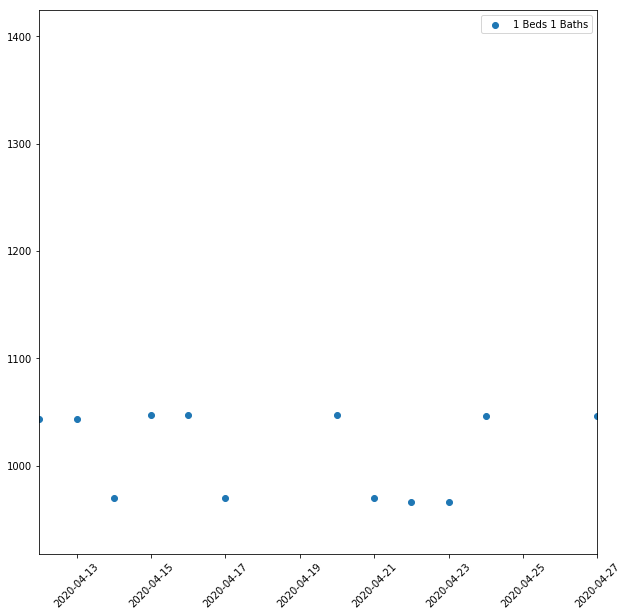

In [31]:
apt_filtered = df[df['Apartment'] == apt_name]
plt.figure(figsize=(10,10))
for row,val in apt_filtered.drop_duplicates(subset=['Beds', 'Baths']).iterrows():
    print(val.Beds, val.Baths)
    new = apt_filtered[apt_filtered.Beds == val.Beds]
    new = new[new.Baths == val.Baths]
    plt.scatter(new.index, new.Rent, label='%s Beds %s Baths' %(val.Beds, int(val.Baths)))
    break
plt.xlim(min(apt_filtered.index), max(apt_filtered.index) )
plt.ylim(min(apt_filtered.Rent) *0.95, max(apt_filtered.Rent) * 1.05)
plt.xticks(rotation=45)
plt.legend()